## Exercice 1 : l’algorithme de Deutsch-Jozsa

f est constante ou équilibrée,

f(x) -> y
(0,1)^n -> {0,1}

constante => tout V x   y = 1 ou tout V x   y = 0

Equilibrée => 1/2 x --> y=0 et 1/2 x --> y=1
( 1/2 des valeurs de y = 1 et 1/2 des valeurs de y = 0 )




pour un algorithme classique on doit tester 2^(n-1) + 1  valeurs de x (la moitié  + 1 ) pour savoir si f est constante ou équilibrée, pourquoi la moitiée ? car si on dépasse la moitié et que la valeur ne change pas on peut en déduire que f est constante car elle ne peut pas être équilibrée.

2^n / 2 + 1 = 2^(n-1) + 1 \ 


En utilisant oracle avec n = 3  (2^3 combinaison)
        ( Oracle )
q0  -----  
q1  -----  ( algo de Deutsch-Jozsa)
q2  -----

q3  Res ----- f(x)=y  

000 0  
001 1  
010 0  
011 1  
100 0  
101 1  
110 0  
111 1  


xxx 0  
xxx 0  
xxx 0  

In [32]:
### Imports 

#### initialization
import numpy as np

#### importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

#### import basic plot tools
from qiskit.visualization import plot_histogram

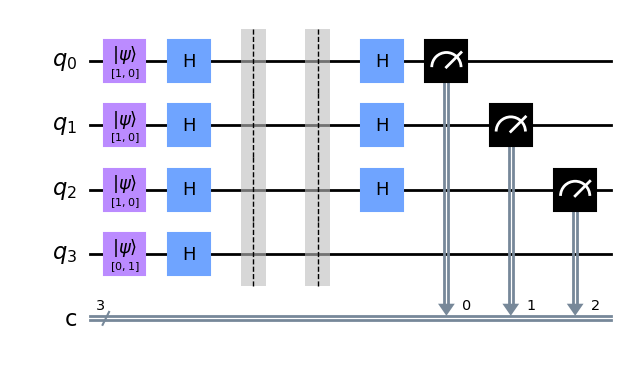

In [33]:
from qiskit import *
import math
import random
q= QuantumRegister(4, name='q')
qc = QuantumCircuit(q)
"""
alpha=random.random()
beta=math.sqrt(1-(alpha**2))
qc.initialize([alpha,beta],0)
qc.initialize([1/math.sqrt(2),1/math.sqrt(2)],1)
qc.initialize([0,1],2)
qc.initialize([1,0],3)
qc.h(0)
"""
n_qubits = 4
c = ClassicalRegister(n_qubits-1, name='c')
q= QuantumRegister(n_qubits, name='q')
qc = QuantumCircuit(q,c)
for x in range(n_qubits-1):
    qc.initialize([1,0],x)
    qc.h(x)
qc.initialize([0,1],n_qubits-1)
qc.h(n_qubits-1)
qc.barrier()
#######
# Apply the quantum oracle

# ce bloc contient l'oracle constant ou l'oracle équilibrée  + l'algorithme de Deutsch-Jozsa

######
qc.barrier()

for x in range(n_qubits-1):
    qc.h(x)
    qc.measure(x,x)

qc.draw('mpl')

In [34]:
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3:

In [35]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
q_3: ─────

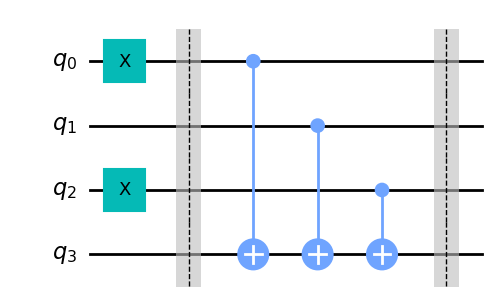

In [36]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw('mpl')

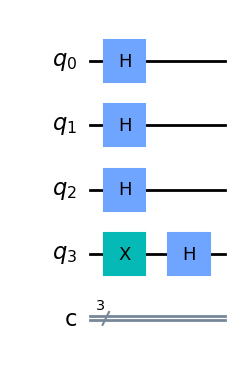

In [37]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw("mpl")

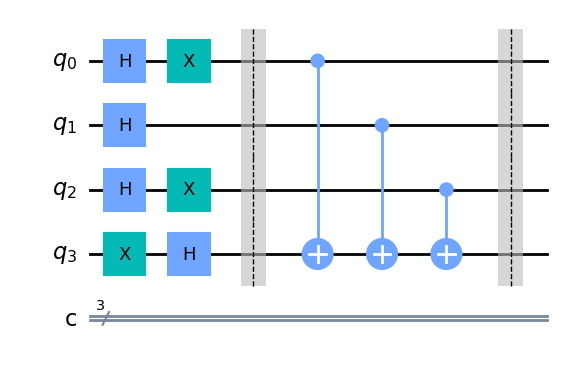

In [38]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit = dj_circuit.compose(balanced_oracle)
dj_circuit.draw("mpl")

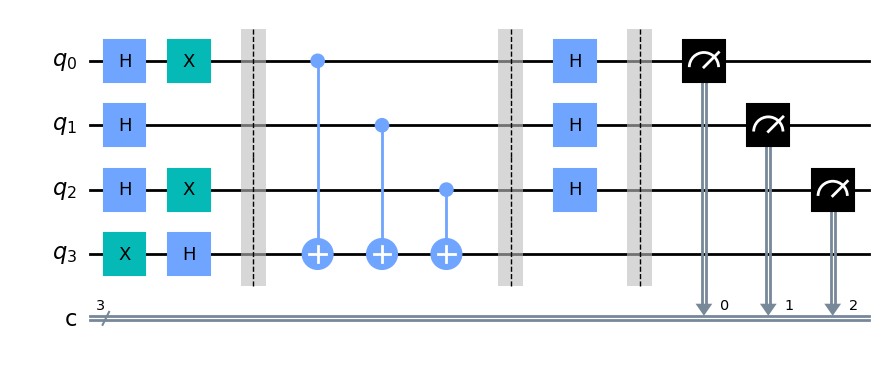

In [39]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit = dj_circuit.compose(balanced_oracle)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl')

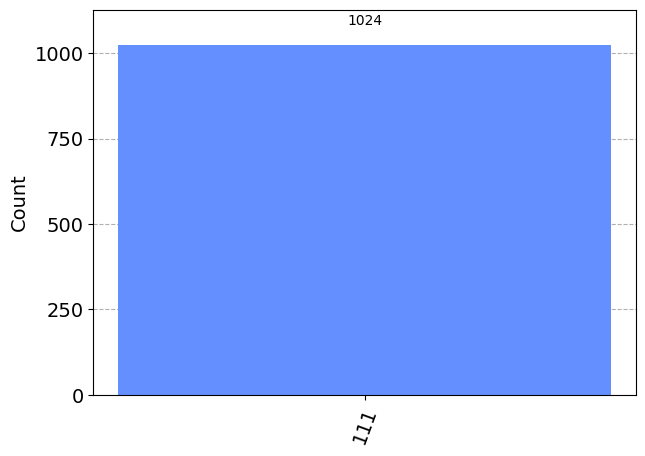

In [40]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(dj_circuit).result()
answer = results.get_counts()

plot_histogram(answer)

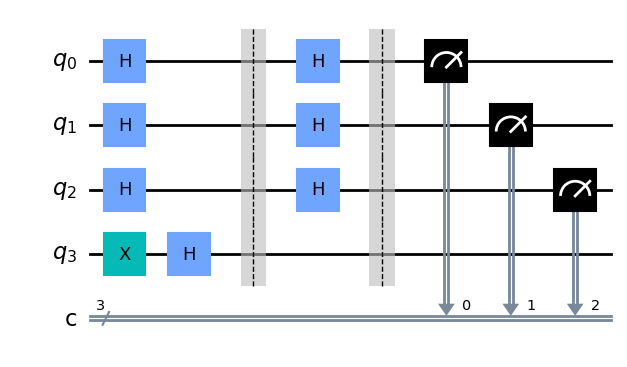

In [41]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.barrier()
# Add oracle
#dj_circuit = dj_circuit.compose(balanced_oracle)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl')

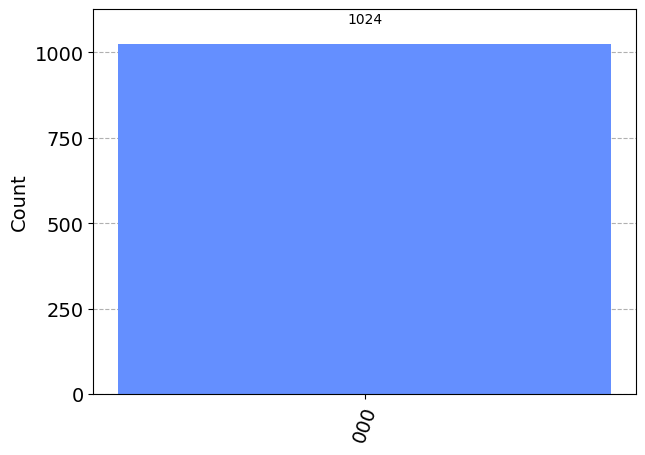

In [42]:
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(dj_circuit).result()
answer = results.get_counts()

plot_histogram(answer)

### Exercice 1 
#### 1. Implémenter les circuits qui représentent l’oracle de votre fonction :
#### Imports

In [43]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

#### Version équilibrée 


l'oracle de la fonction équilibrée est une suite de porte CNOT tel que le qubit de contrôle est le dernier qubit de sortie et les qubits de contrôle sont les qubits d'entrée de la fonction f.
Voici le circuit de l'oracle de la fonction équilibrée :

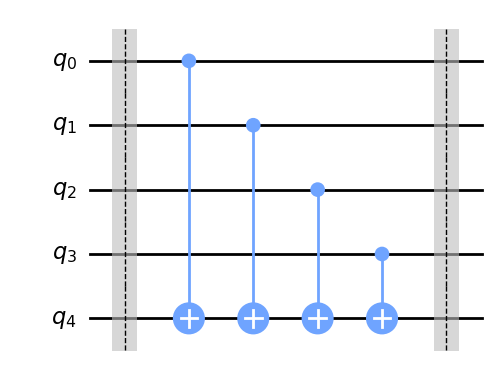

In [44]:
n=4
balanced_oracle = QuantumCircuit(n+1)

balanced_oracle.barrier()
for x in range(n):
    balanced_oracle.cx(x,n)

balanced_oracle.barrier()
balanced_oracle.draw('mpl')

#### Version constante 
l'oracle de la fonction constante est un circuit qui ne fait rien, il ne modifie pas l'état du registre d'entrée.
la sortie est toujours 0.  
Nous pourrions aussi avoir un résultat constant si nous appliquons une porte X sur le registre de sortie.  
Voici le circuit de la fonction constante avec une sortie toujours égale à 0:

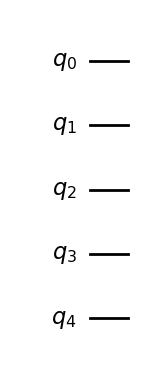

In [45]:
n=4
const_oracle = QuantumCircuit(n+1)

const_oracle.draw('mpl')

#### 2. Existe-t-il d’autres implémentations ?
##### Version équilibrée
Nous pouvons aussi implémenter l'oracle de la fonction équilibrée en ajoutant des portes X sur les qubits d'entrée, à condition de les inverser par la suite.
Voici le circuit de l'oracle de la fonction équilibrée avec des portes X sur les qubits d'entrée :

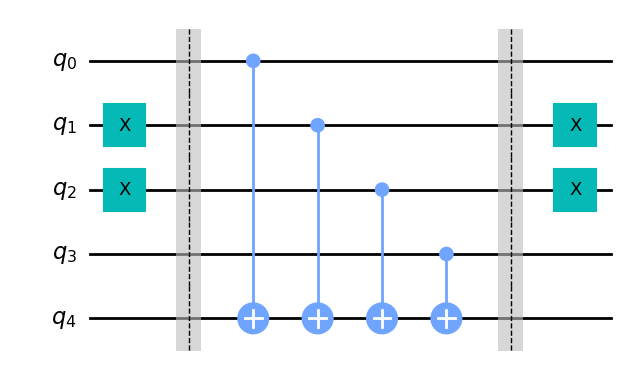

In [46]:
str_input="0110"
n=4
balanced_oracle = QuantumCircuit(n+1)

for x in range(len(str_input)):
    if str_input[x] == '1':
        balanced_oracle.x(x)

balanced_oracle.barrier()
for x in range(n):
    balanced_oracle.cx(x,n)
balanced_oracle.barrier()

for x in range(len(str_input)):
    if str_input[x] == '1':
        balanced_oracle.x(x)

balanced_oracle.draw('mpl')

##### Version Constante
Nous pouvons aussi implémenter l'oracle de la fonction constante en ajoutant une porte X sur le dernier qubit de sortie. Cela revient à une fonction qui renvoie toujours 1.

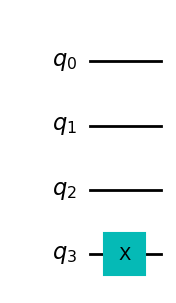

In [47]:
n=3
const_oracle = QuantumCircuit(n+1)
const_oracle.x(n)
const_oracle.draw('mpl')

#### 3. Implémenter l’algorithme Deutsch-jozsa généralisé à n qubits

In [48]:

def Deutsch_jozsa_oracle(case, n):
    oracle_qc = QuantumCircuit(n+1)
    if case == "balanced":
        #b_str = np.random.randint(1,2**n)
        #b_str = format(b_str, '0'+str(n)+'b')
        b_str = ""
        for _ in range(n):
            b_str+=str(np.random.randint(0,1))

        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
    if case == "constant":
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate


def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    for qubit in range(n):
        dj_circuit.h(qubit)
    dj_circuit.x(n)
    dj_circuit.h(n)
    dj_circuit.append(oracle, range(n+1))
    for qubit in range(n):
        dj_circuit.h(qubit)
    for i in range(n):
        dj_circuit.measure(i, i)
    return dj_circuit


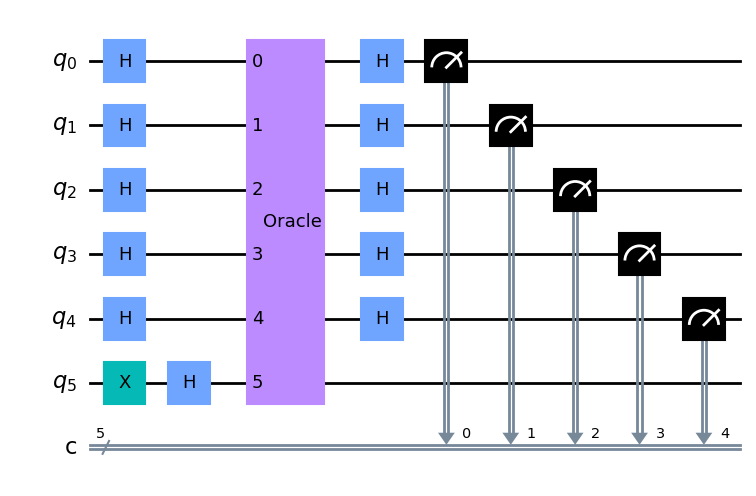

In [49]:
n=5
oracle_gate = Deutsch_jozsa_oracle("balanced", n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw('mpl')

#### 4. utiliser l’oracle dj_problem_oracle de la librairie qiskit_textbook.problems

d'après la documentation, la fonction dj_problem_oracle() prend en argument un entier entre 1 et 5 qui correspond à une fonction f(x) constante ou équilibrée.
cas 1 : 

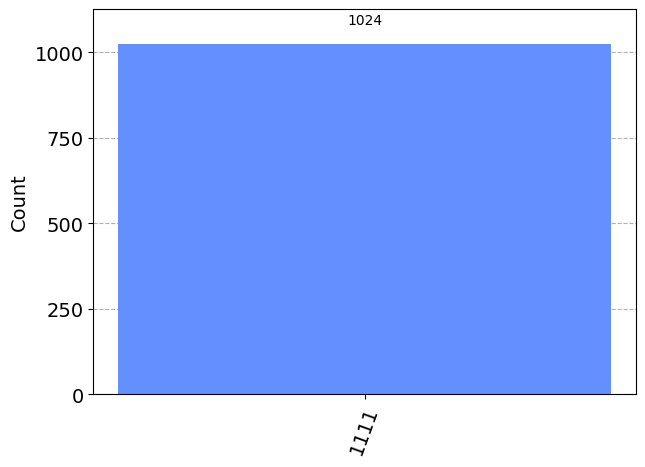

In [50]:
from qiskit_textbook.problems import dj_problem_oracle
oracle = dj_problem_oracle(1)
dj_circuit_problem=dj_algorithm(oracle, 4)
transpiled_dj_circuit = transpile(dj_circuit_problem, aer_sim)
results = aer_sim.run(transpiled_dj_circuit).result()
answer = results.get_counts()
plot_histogram(answer)

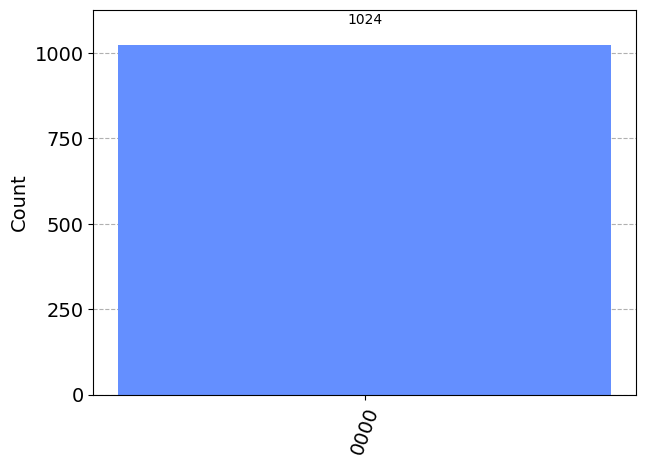

In [51]:
# cas 2
from qiskit_textbook.problems import dj_problem_oracle
oracle = dj_problem_oracle(2)
dj_circuit_problem=dj_algorithm(oracle, 4)
transpiled_dj_circuit = transpile(dj_circuit_problem, aer_sim)
results = aer_sim.run(transpiled_dj_circuit).result()
answer = results.get_counts()
plot_histogram(answer)

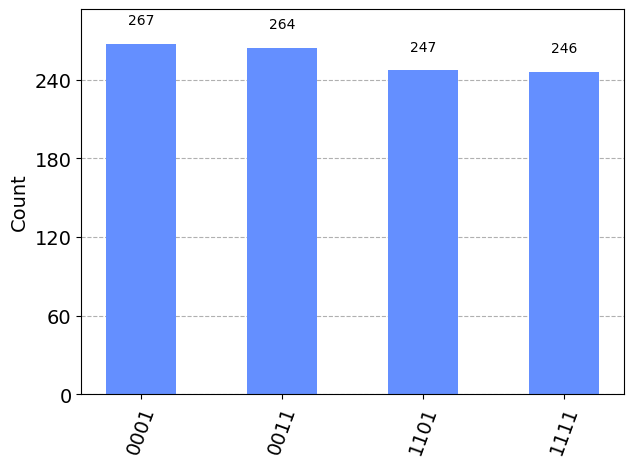

In [52]:
# cas 3
from qiskit_textbook.problems import dj_problem_oracle
oracle = dj_problem_oracle(3)
dj_circuit_problem=dj_algorithm(oracle, 4)
transpiled_dj_circuit = transpile(dj_circuit_problem, aer_sim)
results = aer_sim.run(transpiled_dj_circuit).result()
answer = results.get_counts()
plot_histogram(answer)

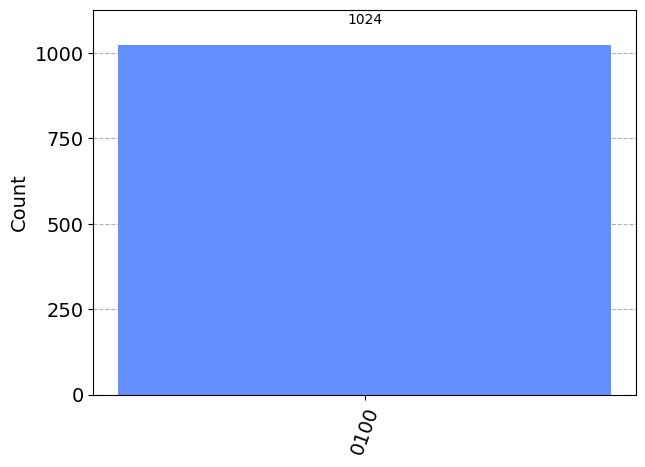

In [53]:
# cas 4
from qiskit_textbook.problems import dj_problem_oracle
oracle = dj_problem_oracle(4)
dj_circuit_problem=dj_algorithm(oracle, 4)
transpiled_dj_circuit = transpile(dj_circuit_problem, aer_sim)
results = aer_sim.run(transpiled_dj_circuit).result()
answer = results.get_counts()
plot_histogram(answer)

There are only currently 4 oracles in this problem set, returning empty (balanced) gate


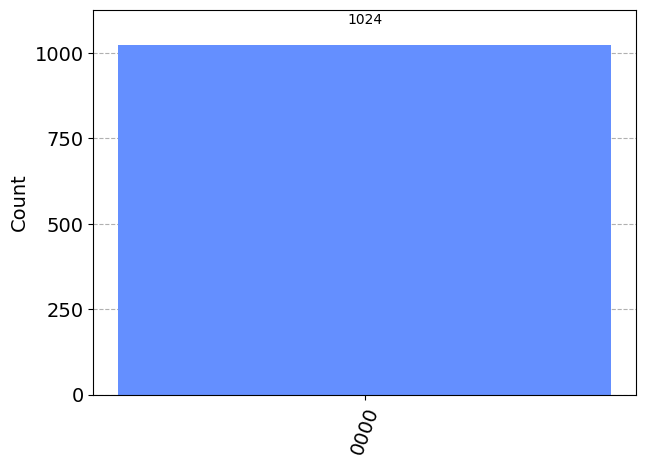

In [54]:
# cas 5
from qiskit_textbook.problems import dj_problem_oracle
oracle = dj_problem_oracle(5)
dj_circuit_problem=dj_algorithm(oracle, 4)
transpiled_dj_circuit = transpile(dj_circuit_problem, aer_sim)
results = aer_sim.run(transpiled_dj_circuit).result()
answer = results.get_counts()
plot_histogram(answer)

#### 5. Expliquer le fonctionnement de « dj_problem_oracle.

La fonction dj_problem_oracle prend en argument un entier entre 1 et 5 qui correspond à une fonction f(x) constante ou équilibrée.
- dj_problem_oracle(1) : fonction est équilibrée car elle renvoie 1111
- dj_problem_oracle(2) : fonction est constante car elle renvoie 0000
- dj_problem_oracle(3) : On ne peut pas savoir, l'oracle renvoie plusieurs valeurs, et la valeur la plus probable est différente de 0000 et 1111 si on consièdre les erreurs de mésure donc on ne peut pas savoir.
- dj_problem_oracle(4) : On ne peut pas savoir, l'oracle renvoie une valeur autre que 0000 et 1111
- dj_problem_oracle(5) : fonction est constante car elle renvoie 0000


#### 6. les différentes étapes et le résultat de votre implémentation sur le simulateur (aer_simulator) et le vrai ordinateur quantique IBM. 


L'implémentation de l'algorithme de Deutsch-Jozsa sur le simulateur est classique, nous obtenons un résultat de 0 pour la fonction constante et un résultat de 1 pour la fonction équilibrée.
En utilisant les algorithmes de la question 2, nous obtenons les résultats suivants :

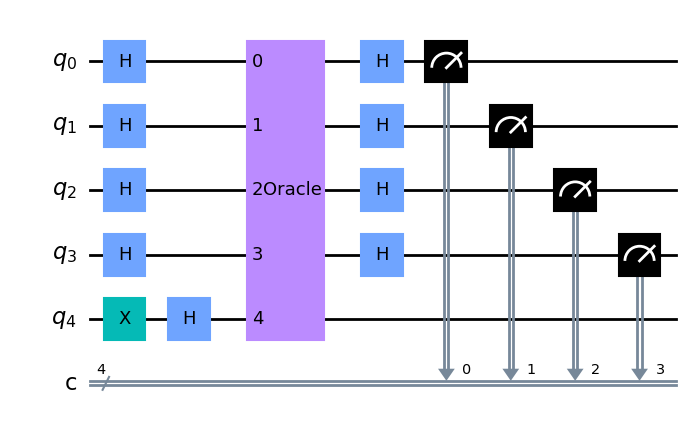

In [55]:
# cas : Oracle equilibré
n=4
oracle_gate = Deutsch_jozsa_oracle("balanced", n)
dj_circuit_equilibre = dj_algorithm(oracle_gate, n)
dj_circuit_equilibre.draw('mpl')

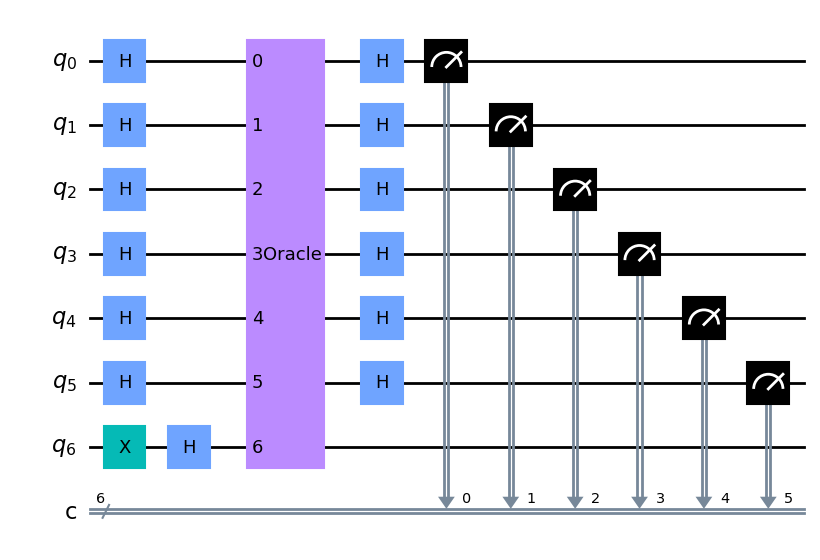

In [56]:
# cas : Oracle constant
n=6
oracle_gate = Deutsch_jozsa_oracle("constant", n)
dj_circuit_constant = dj_algorithm(oracle_gate, n)
dj_circuit_constant.draw('mpl')

##### Aer simulator
Résultat cas équilibré

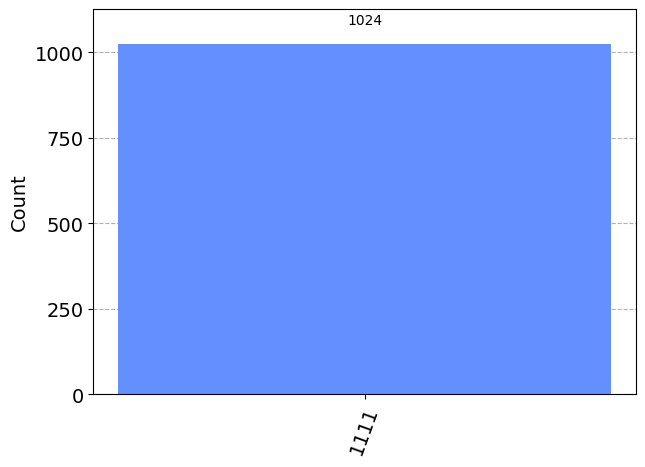

In [57]:
transpiled_dj_circuit = transpile(dj_circuit_equilibre, aer_sim)
results = aer_sim.run(transpiled_dj_circuit).result()
answer = results.get_counts()
plot_histogram(answer)

Resultat cas constant

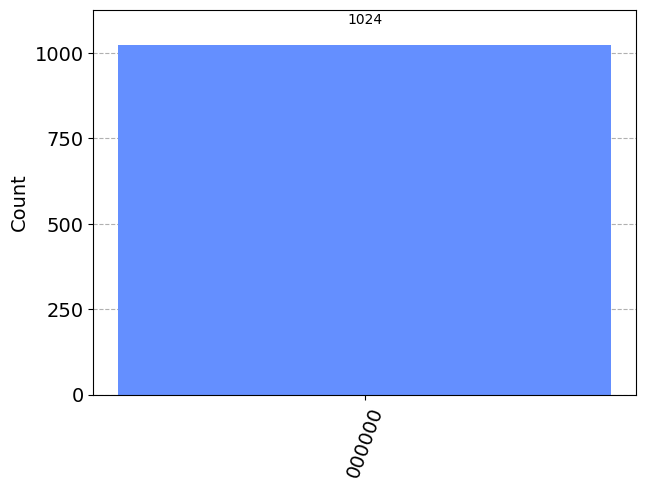

In [58]:
transpiled_dj_circuit = transpile(dj_circuit_constant, aer_sim)
results = aer_sim.run(transpiled_dj_circuit).result()
answer = results.get_counts()
plot_histogram(answer)

On peut conclure que l'algorithme de Deutsch-Jozsa fonctionne correctement sur le simulateur.

##### Quantum computer IBM

Pour executer la simulatino dans un vrai ordinateur quantique, nous avons utilisé les ordinatuers quantiques de IBM.
- nous déclarons notre compte IBM avec notre token
- nous choisissons l'ordinateur quantique que nous voulons utiliser (le moins occupé)
- nous exécutons notre circuit sur l'ordinateur quantique
- nous récupérons les résultats

In [59]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and not x.configuration().simulator and x.status().operational==True))
print(provider.backends())


ibmqfactory.load_account:WARNING:2023-11-20 19:37:52,115: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>]


Résultat cas équilibré

In [61]:
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(dj_circuit_equilibre, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

Job Status: job is queued (None)

Résultat cas constant

Job Status: job has successfully run


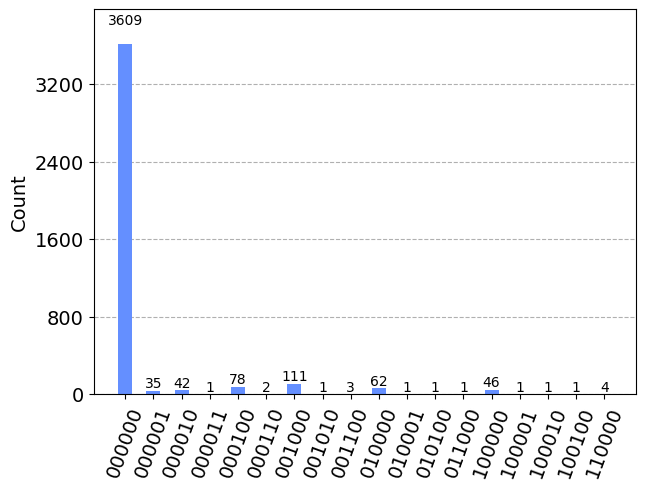

In [ ]:
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(dj_circuit_constant, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

Les résultats obtenus sont identiques à ceux du simulateur compte tenu des erreurs de mesure. Nous pouvons donc conclure que l'algorithme de Deutsch-Jozsa fonctionne correctement sur un ordinateur quantique.